<a href="https://colab.research.google.com/github/monicaindrawan/rfm_analysis/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation using RFM Analysis**

# Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
!pip install pandas

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

# Import Data

In [ ]:
retail_df = pd.read_csv('order_data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


# Filtering Data & Remove Null Values

The data used in this project is filtered so that only quantity over zero are included

In [ ]:
retail_df = retail_df.loc[retail_df['Quantity'] > 0]
retail_df.dropna(subset=['CustomerID'],inplace=True)
retail_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


# Recency

The recency is the number of days since the customers have made their last purchase

In [ ]:
retail_df['InvoiceDate']= pd.to_datetime(retail_df['InvoiceDate'])
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].apply(lambda x: x.replace(year = x.year + 9))
recency_df = retail_df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'LastPurchaseDate'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
now = pd.to_datetime('2021-02-25')
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df

,CustomerID,LastPurchaseDate,Recency
0,12346,2020-01-18 10:01:00,403
1,12347,2020-12-07 15:52:00,79
2,12348,2020-09-25 13:13:00,152
3,12349,2020-11-21 09:51:00,95
4,12350,2020-02-02 16:01:00,388
...,...,...,...
4334,18280,2020-03-07 09:52:00,354
4335,18281,2020-06-12 10:53:00,257
4336,18282,2020-12-02 11:43:00,84
4337,18283,2020-12-06 12:02:00,80


# Frequency

The frequency is the number of purchases that the customers have made

In [ ]:
frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,756


# Monetary

The monetary is the amount of money that the customers have spend from their purchases

In [ ]:
retail_df['Revenue'] = retail_df['Quantity'] * retail_df['UnitPrice']
monetary_df = retail_df.groupby('CustomerID')['Revenue'].sum().reset_index().rename(columns={'Revenue':'Monetary'})
monetary_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


# RFM Analysis

After the recency, frequency and monetary scorse are obtained, we will calculated the RFM Score  using this formula:

RFM Score= (Recency x 100) + (Frequency x 10) + (Monetary)

In [ ]:
rfm_df = recency_df.merge(frequency_df, on="CustomerID")
rfm_df = rfm_df.merge(monetary_df, on="CustomerID")
rfm_df = rfm_df.drop(['LastPurchaseDate'],axis = 1)
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,403,1,77183.60
1,12347,79,182,4310.00
2,12348,152,31,1797.24
3,12349,95,73,1757.55
4,12350,388,17,334.40
...,...,...,...,...
4334,18280,354,10,180.60
4335,18281,257,7,80.82
4336,18282,84,12,178.05
4337,18283,80,756,2094.88


In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
score_dict = quantiles.to_dict()

def rscore(x):
  if x <= score_dict['Recency'][0.25]:
    return 4
  elif x <= score_dict['Recency'][0.5]:
    return 3
  elif x <= score_dict['Recency'][0.75]:
    return 2
  else:
    return 1

def fmscore(x,value):
  if x <= score_dict[value][0.25]:
    return 1
  elif x <= score_dict[value][0.5]:
    return 2
  elif x <= score_dict[value][0.75]:
    return 3
  else:
    return 4

rfm_df['R_Quartile'] = rfm_df['Recency'].apply(lambda x: rscore(x))
rfm_df['F_Quartile'] = rfm_df['Frequency'].apply(lambda x: fmscore(x,'Frequency'))
rfm_df['M_Quartile'] = rfm_df['Monetary'].apply(lambda x: fmscore(x,'Monetary'))
rfm_df['RFM_Score'] = rfm_df['R_Quartile'].map(str) + rfm_df['F_Quartile'].map(str) + rfm_df['M_Quartile'].map(str)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
0,12346,403,1,77183.60,1,1,4,114
1,12347,79,182,4310.00,4,4,4,444
2,12348,152,31,1797.24,2,2,4,224
3,12349,95,73,1757.55,3,3,4,334
4,12350,388,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,354,10,180.60,1,1,1,111
4335,18281,257,7,80.82,1,1,1,111
4336,18282,84,12,178.05,4,1,1,411
4337,18283,80,756,2094.88,4,4,4,444


# Customer Segmentation

Based on the RFM Score, we will do the customer segmentation.

There are 8 customer segments applied in this project using reference from [this website](https://www.nextlytics.com/blog/machine-learning-in-customer-segmentation-with-rfm-analysis). 



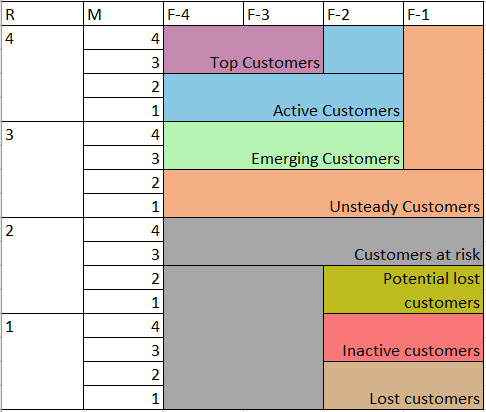

Below are the description for each segmentation

1. Top Customers: The customers who spend the most, recently and frequently

Recommendation: The customers are deserved to be given a loyalty or membership special rewards that includes promotions and discounts so that they can be more royal and also notification for the new products so they can help promote it.

2. Active Customers: The customers who still buy the most recent but doesn't spend much

Recommendation: The customers can be given a promotion such as cashback and discounts for a some minimum dollar threshold (high price items)

3. Emerging Customers: Recent customers who are big spenders but has more diversity in frequency

Recommendation: The customers are likely suitable to be given a vouchers and coupons for the next purchases so that it can increase monetary and frequency values.

4. Unsteady Customers: The customers who spend recently but not often

Recommendation: The customers are more suitable to be offered cross-selling and up-selling products such as bundles

5. Customers at Risk: The customers who haven't spend recently

Recommendation: The customers can be offered personalized reactivation campaigns and renewals.

6. Potential Lost Customers: The customers who have below average of recency, frequency and monetary.

Recommendation: The customers can be given a number of small discounts to motivate them making purchases again.

7. Inactive Customers: The customers who spend a big amount of money but long time ago.

Recommendation: The customers can be given notification regarding promotions on relevant products that the customers are used to buy.

8. Lost Customers: The customers who buy rarely, non-current and spend a little in their purchases

Recommendation: It is better to not give any campaign towards them because there's a large possibility that the campaign will fail anyway.

In [ ]:
def segment(x):
  if x['R_Quartile'] == 4:
    if x['M_Quartile'] >= 3 and x['M_Quartile'] <= 4:
      if x['F_Quartile'] >= 3 and x['F_Quartile'] <= 4:
        return "Top Customers"
      elif x['F_Quartile'] == 2:
        return "Active Customers"
      else:
        return "Unsteady Customers"
    elif x['M_Quartile'] >= 1 and x['M_Quartile'] <= 2:
      if x['F_Quartile'] >= 2 and x['F_Quartile'] <= 4:
        return "Active Customers"
      else:
        return "Unsteady Customers"
  elif x['R_Quartile'] == 3:
    if x['M_Quartile'] >= 3 and x['M_Quartile'] <= 4:
      if x['F_Quartile'] >= 2 and x['F_Quartile'] <= 4:
        return "Emerging Customers"
      else:
        return "Unsteady Customers"
    else:
      return "Unsteady Customers"
  elif x['R_Quartile'] == 2:
    if x['M_Quartile'] >= 3 and x['M_Quartile'] <= 4:
      return "Customers at Risk"
    else:
      if x['F_Quartile'] >= 3 and x['F_Quartile'] <= 4:
        return "Customers at Risk"
      else:
        return "Potential Lost Customers"
  elif x['R_Quartile'] == 1:
    if x['M_Quartile'] >= 3 and x['M_Quartile'] <= 4:
      if x['F_Quartile'] >= 3 and x['F_Quartile'] <= 4:
        return "Customers at Risk"
      else:
        return "Inactive Customers"
    elif x['M_Quartile'] >= 1 and x['M_Quartile'] <= 2:
      if x['F_Quartile'] >= 3 and x['F_Quartile'] <= 4:
        return "Customers at Risk"
      else:
        return "Lost Customers"

rfm_df['Customer_Segmentation'] = rfm_df.apply(lambda x: segment(x), axis = 1)
rfm_df

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,Customer_Segmentation
0,12346,403,1,77183.60,1,1,4,114,Inactive Customers
1,12347,79,182,4310.00,4,4,4,444,Top Customers
2,12348,152,31,1797.24,2,2,4,224,Customers at Risk
3,12349,95,73,1757.55,3,3,4,334,Emerging Customers
4,12350,388,17,334.40,1,1,2,112,Lost Customers
...,...,...,...,...,...,...,...,...,...
4334,18280,354,10,180.60,1,1,1,111,Lost Customers
4335,18281,257,7,80.82,1,1,1,111,Lost Customers
4336,18282,84,12,178.05,4,1,1,411,Unsteady Customers
4337,18283,80,756,2094.88,4,4,4,444,Top Customers


In [ ]:
rfm_df[['Recency','Frequency','Monetary','Customer_Segmentation']].groupby('Customer_Segmentation').median()

,Recency,Frequency,Monetary
Customer_Segmentation,,,
Active Customers,86,35,522.745
Customers at Risk,166,63,1049.745
Emerging Customers,106,103,1611.025
Inactive Customers,303,21,931.500
Lost Customers,326,14,241.060
Potential Lost Customers,155,16,309.045
Top Customers,84,156,2531.580
Unsteady Customers,105,18,330.240


# Extract Data

In [ ]:
df = retail_df.merge(rfm_df, on="CustomerID")
df.to_csv("rfm_analysis.csv", index = False)